In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns 

In [22]:
df=pd.read_csv("Iris.csv")
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [29]:
X=df[df.columns[:4]]
Y=list(df[df.columns[-1]])        #taking last column as target attribute,assigning to Y
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [30]:
#splitting data into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =1/5, random_state = 104,shuffle=True)

In [31]:
#knn classification
from sklearn.metrics.pairwise import euclidean_distances
X_train =np.array(X_train)
X_test =np.array(X_test)

def knn_classifier(X_train, y_train, X_test,i):
    y_pred = []
    for test_sample in X_test:
        # Compute distances between the test sample and all training samples
        distances = [np.linalg.norm(test_sample - train_sample) for train_sample in X_train]
        # Get indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:i]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Predict the class label based on majority vote
        y_pred.append(max(set(k_nearest_labels), key = k_nearest_labels.count))
    return y_pred    
predicted = knn_classifier(X_train,y_train,X_test,5)          

In [32]:
#confusion metrics 
y_test = list(np.array(y_test))
print(y_test)
predicted = list(np.array(predicted))
from sklearn import metrics
confusion_matrix = np.array(metrics.confusion_matrix(y_test,predicted))
print(confusion_matrix.shape)
print(confusion_matrix)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor']
(3, 3)
[[12  0  0]
 [ 0 12  0]
 [ 0  0  6]]


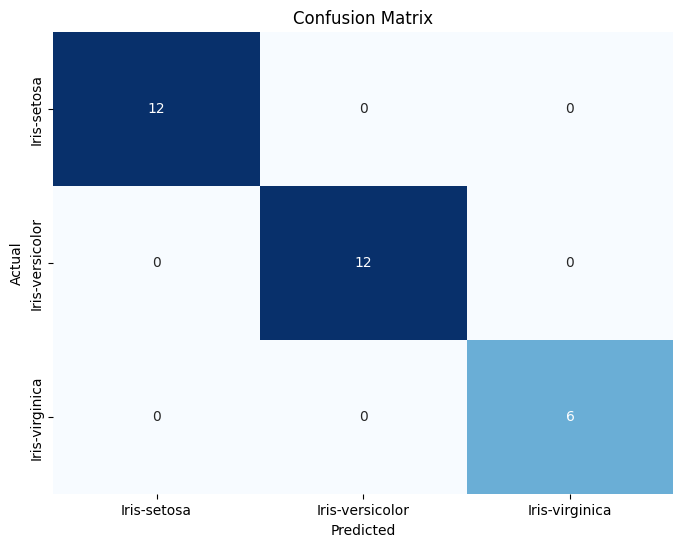

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_names = np.unique(Y)  
confusion_matrix = np.array([[12, 0, 0],
                              [0, 12, 0],
                              [0, 0, 6]])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_names ,yticklabels= class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()